# Explore Intensive Care Dataset

This notebook is used to explore the `nice-covid-19-intensive-care.csv` dataset. It contains various graph that visualize the data in the dataset.

In [1]:
import pandas as pd

## Load dataset

In [2]:
df = pd.read_csv("../data/processed/nice-covid-19-intensive-care.csv")

In [3]:
df["Datum"] = pd.to_datetime(df["Datum"])
df["NieuwOpgenomenBewezen"] = df["NieuwOpgenomenBewezen"].astype(int)
df["OpgenomenCumulatief"] = df["OpgenomenCumulatief"].astype(int)
df["OverleeftCumulatief"] = df["OverleeftCumulatief"].astype(int)
df["OverledenCumulatief"] = df["OverledenCumulatief"].astype(int)
df["Opgenomen"] = df["Opgenomen"].astype(int)
df["IntensiveCare"] = df["IntensiveCare"].astype(int)
df["NieuwOpgenomenVerdacht"] = df["NieuwOpgenomenVerdacht"].astype(int)

## Inspect dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datum                   146 non-null    datetime64[ns]
 1   Opgenomen               146 non-null    int64         
 2   OverleeftCumulatief     146 non-null    int64         
 3   IntensiveCare           146 non-null    int64         
 4   OverledenCumulatief     146 non-null    int64         
 5   OpgenomenCumulatief     146 non-null    int64         
 6   NieuwOpgenomenBewezen   146 non-null    int64         
 7   NieuwOpgenomenVerdacht  146 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 9.2 KB


In [5]:
df.head()

,Datum,Opgenomen,OverleeftCumulatief,IntensiveCare,OverledenCumulatief,OpgenomenCumulatief,NieuwOpgenomenBewezen,NieuwOpgenomenVerdacht
0,2020-02-27,7,0,4,0,7,1,0
1,2020-02-28,8,0,5,0,8,0,1
2,2020-02-29,9,0,4,0,9,0,0
3,2020-03-01,11,0,5,0,11,2,0
4,2020-03-02,10,0,5,0,11,0,0


In [6]:
df.tail()

,Datum,Opgenomen,OverleeftCumulatief,IntensiveCare,OverledenCumulatief,OpgenomenCumulatief,NieuwOpgenomenBewezen,NieuwOpgenomenVerdacht
141,2020-07-17,29,1882,19,867,2926,0,0
142,2020-07-18,29,1882,19,867,2926,0,0
143,2020-07-19,31,1882,19,867,2927,1,0
144,2020-07-20,32,1884,19,867,2929,0,2
145,2020-07-21,33,1885,18,867,2931,0,2


## Visualize hospitalized (per day)

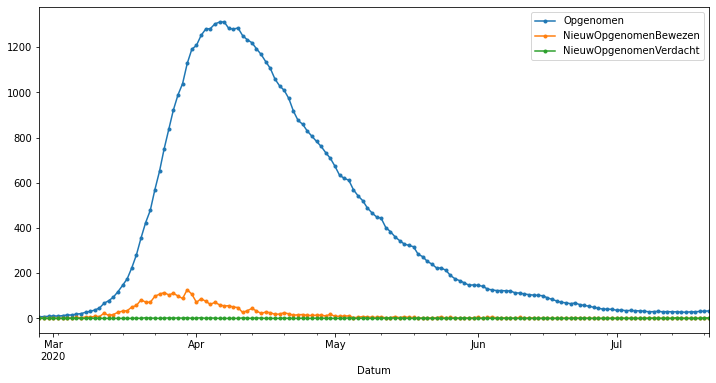

In [7]:
df.plot(
    x="Datum",
    y=["Opgenomen", "NieuwOpgenomenBewezen", "NieuwOpgenomenVerdacht"],
    figsize=(12,6),
    style=".-",
)

## Visualize intensive cares (per day)

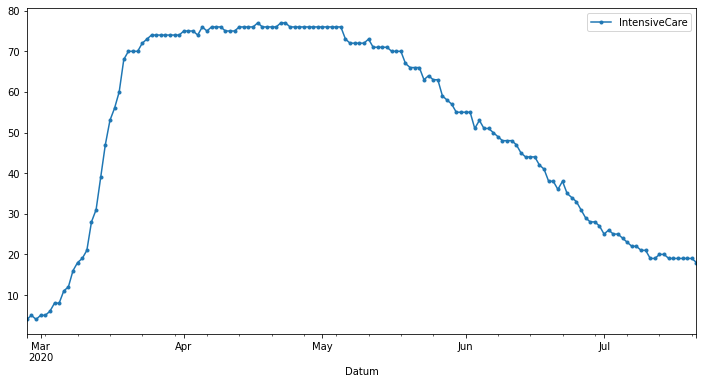

In [8]:
df.plot(
    x="Datum",
    y=["IntensiveCare"],
    figsize=(12,6),
    style=".-",
)

## Visualize total (per day)

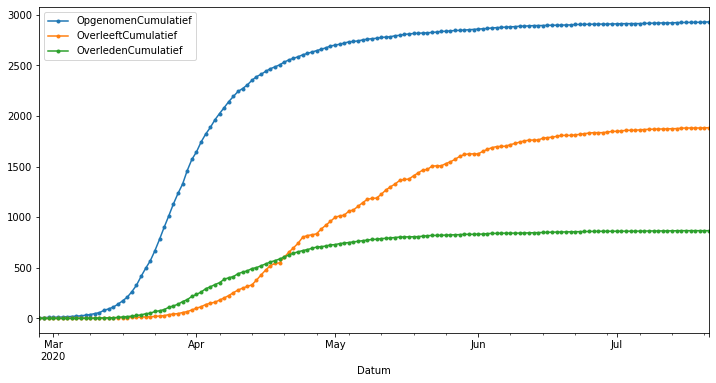

In [9]:
df.plot(
    x="Datum",
    y=["OpgenomenCumulatief", "OverleeftCumulatief", "OverledenCumulatief"],
    figsize=(12,6),
    style=".-",
)

## Visualize difference (per day)

In [10]:
df["OpgenomenCumulatiefDiff"] = df["OpgenomenCumulatief"].diff()
df["OverleeftCumulatiefDiff"] = df["OverleeftCumulatief"].diff()
df["OverledenCumulatiefDiff"] = df["OverledenCumulatief"].diff()

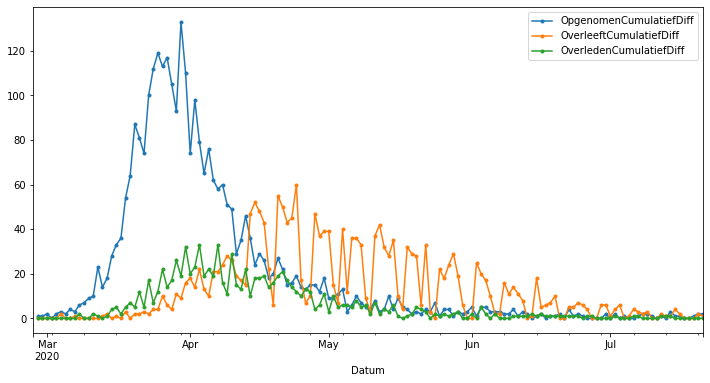

In [11]:
df.plot(
    x="Datum",
    y=["OpgenomenCumulatiefDiff", "OverleeftCumulatiefDiff", "OverledenCumulatiefDiff"],
    figsize=(12,6),
    style=".-",
)